In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

#plt.style.use('seaborn')
sns.set(style="whitegrid")

### Questão 1

##### 1)
Temos que a p.d.f da distribuição normal $\mathcal{N}(\mu, \sigma^2)$ é dada por:

$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} exp^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Para um dataset qualquer $\mathcal{D} = \{x_1, x_2,...,x_N\}$, a função <i>likelihood</i> é dada por:

$$\mathcal{L}(\theta, \mathcal{D}) = p(\mathcal{D} | \theta) = \prod_{i=1}^N f(x_i | \mu, \sigma^2)$$

Aqui, como nossas amostras são valores em $\mathbb{R}$, o vetor de parâmetro $\theta$ possui apenas dois parâmetros: a média da normal $\mu$ e a variância $\sigma^2$.

##### 2)
Para obter o estimador de máxima verossimilhança neste caso, podemos, primeiro, utilizar a função de <i>log-likelihood</i>, e derivá-la com relação a $\mu$ e $\sigma^2$. Ao igualar cada derivada parcial a 0, podemos obter os valores de $\hat{\mu}_{MLE}$ e $\hat{\sigma}^2_{MLE}$.

$$log \mathcal{L}(\theta, \mathcal{D}) = \sum_{i=1}^N \Big( -\frac{(x_i-\mu)^2}{2\sigma^2} - log \sigma - \frac{1}{2}log2\pi \Big) $$

$$\frac{\delta \mathcal{L}}{\delta \mu} = \sum_{i=1}^N \frac{x_i - \mu}{\sigma^2} = 0$$
$$\sum_{i=1}^N x_i - N\hat{\mu}_{MLE} = 0$$
$$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^N x_i = \overline{x}$$

Ou seja, o estimador de máxima verossimilhança para a média da normal $\hat{\mu}_{MLE}$ é igual à média amostral. Já para $\hat{\sigma}^2_{MLE}$, temos:

$$\frac{\delta \mathcal{L}}{\delta \sigma} = -\frac{N}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^N (x_i - \mu)^2 = 0$$
$$\frac{1}{\hat{\sigma}^2_{MLE}}\sum_{i=1}^N (x_i - \mu)^2 = N$$
$$\hat{\sigma}^2_{MLE} = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

Em outras palavras, o estimador de máxima verossimilhança para a variância da normal $\hat{\sigma}^2_{MLE}$ é igual à variância empírica. Vale ressaltar, no entanto, que este é um estimador enviesado para a variância, embora fácil de corrigir, multiplicando por um fator $\frac{N}{N-1}$.

### Questão 2

In [7]:
def mle_normal(data):
    mean_mle = data.mean()
    var_mle = ((data - mean_mle)**2).mean()
    return mean_mle, var_mle

def mle_uniform(data):
    min_mle = data.min()
    max_mle = data.max()
    return min_mle, max_mle

def normal_likelihood(data, mean, var):
    likelihood = np.prod(1/np.sqrt(2*np.pi*var)*np.exp(-(data - mean)**2/(2*var)))
    return likelihood

def uniform_likelihood(data, min_value, max_value):
    indicator = np.all(np.logical_and(data >= min_value, data <= max_value))
    n_samples = len(data)
    likelihood = (1/(max_value - min_value))**n_samples
    return likelihood

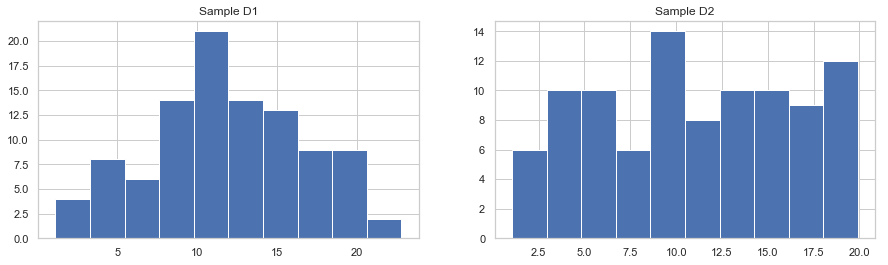

Considering D1 is generated by a normal distribution, we obtain:
MLE mean: 11.779120631770615
MLE variance: 21.697698485025686
Considering D1 is generated by a uniform distribution, we obtain:
MLE minimum: 1.1372081248391
MLE maximum: 22.7647296733477

Considering D2 is generated by a normal distribution, we obtain:
MLE mean: 11.02075735317513
MLE variance: 27.763774884064702
Considering D2 is generated by a uniform distribution, we obtain:
MLE minimum: 1.05171671230868
MLE maximum: 19.9164598600995

Likelihood of D1 being generated by a normal distribution: 3.594173131529024e-129
Likelihood of D1 being generated by a uniform distribution: 3.1573640536254534e-134

Likelihood of D2 being generated by a normal distribution: 7.802592571730125e-128
Likelihood of D2 being generated by a uniform distribution: 6.503764940879019e-122


In [6]:
#Load datasets
file1 = open('./data-sets/D2/data-l2-p-1a.txt', 'r')
file2 = open('./data-sets/D2/data-l2-p-1b.txt', 'r')

samples1 = file1.readlines()
samples2 = file2.readlines()
samples1 = np.array([float(val[1:-2]) for val in samples1[10:]])
samples2 = np.array([float(val[1:-2]) for val in samples2[10:]])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(samples1)
plt.title("Sample D1")
plt.subplot(1,2,2)
plt.hist(samples2)
plt.title("Sample D2")
plt.show()

#Calculate D1 MLE for Normal and Uniform distributions
mle_normal_mean_D1, mle_normal_var_D1 = mle_normal(samples1)
mle_uniform_min_D1, mle_uniform_max_D1 = mle_uniform(samples1)

print("Considering D1 is generated by a normal distribution, we obtain:\n"
      "MLE mean: {}\n"
      "MLE variance: {}".
     format(mle_normal_mean_D1, mle_normal_var_D1)
     )
print("Considering D1 is generated by a uniform distribution, we obtain:\n"
      "MLE minimum: {}\n"
      "MLE maximum: {}".
     format(mle_uniform_min_D1, mle_uniform_max_D1)
     )

print()

#Calculate D2 MLE for Normal and Uniform distributions
mle_normal_mean_D2, mle_normal_var_D2 = mle_normal(samples2)
mle_uniform_min_D2, mle_uniform_max_D2 = mle_uniform(samples2)

print("Considering D2 is generated by a normal distribution, we obtain:\n"
      "MLE mean: {}\n"
      "MLE variance: {}".
     format(mle_normal_mean_D2, mle_normal_var_D2)
     )
print("Considering D2 is generated by a uniform distribution, we obtain:\n"
      "MLE minimum: {}\n"
      "MLE maximum: {}".
     format(mle_uniform_min_D2, mle_uniform_max_D2)
     )

print()

#Calculate D1 likelihood for the calculated MLE
D1_normal_likelihood = normal_likelihood(samples1, mle_normal_mean_D1, mle_normal_var_D1)
D1_uniform_likelihood = uniform_likelihood(samples1, mle_uniform_min_D1, mle_uniform_max_D1)

#Calculate D2 likelihood for the calculated MLE
D2_normal_likelihood = normal_likelihood(samples2, mle_normal_mean_D2, mle_normal_var_D2)
D2_uniform_likelihood = uniform_likelihood(samples2, mle_uniform_min_D2, mle_uniform_max_D2)

print("Likelihood of D1 being generated by a normal distribution: {}".format(D1_normal_likelihood))
print("Likelihood of D1 being generated by a uniform distribution: {}".format(D1_uniform_likelihood))
print()
print("Likelihood of D2 being generated by a normal distribution: {}".format(D2_normal_likelihood))
print("Likelihood of D2 being generated by a uniform distribution: {}".format(D2_uniform_likelihood))

Logo, concluímos que é mais provável que D1 tenha sido gerado por uma distribuição normal, enquanto D2 é gerado por uma distribuição uniforme. Uma maneira de quantificar isso é calculando o <i>likelihood ratio</i> entre as duas distribuições para cada dataset. Se considerarmos que o <i>prior</i> de cada distribuição é igual, isso equivale a calcular a razão entre o <i>posterior</i> de cada uma delas:

$$\frac{P(h_{normal} | \mathcal{D})}{P(h_{uniform} | \mathcal{D})} = \frac{P(\mathcal{D}|h_{normal})P(h_{normal})}{P(\mathcal{D})}.\frac{P(\mathcal{D})}{P(\mathcal{D}|h_{uniform})P(h_{uniform})}$$

Mas como consideramos que $P(h_{uniform}) = P(h_{normal}) = 0.5$, temos:

$$\frac{P(h_{normal} | \mathcal{D})}{P(h_{uniform} | \mathcal{D})} = \frac{P(\mathcal{D}|h_{normal})}{P(\mathcal{D}|h_{uniform})}$$

Em termos práticos, para $\mathcal{D1}$ e $\mathcal{D2}$ temos:

In [7]:
print("D1 likelihood ratio: {}".format(D1_normal_likelihood/D1_uniform_likelihood))
print("D2 likelihood ratio: {}".format(D2_normal_likelihood/D2_uniform_likelihood))

D1 likelihood ratio: 113834.61236920091
D2 likelihood ratio: 1.1997039626520639e-06


Ou seja, é 113834 vezes mais provável que D1 tenha vindo de uma distribuição normal, enquanto D2 é mais provável de ter vindo de uma uniforme.

### Questão 3

In [7]:
train = [[334, 39300],
         [438, 60000],
         [520, 68500],
         [605, 86000],
         [672, 113000],
         [767, 133000]]

test =  [[848] ,[912]]

df_train = pd.DataFrame(train, columns=['Área do imóvel(sq ft)', 'Preço de venda($)'])
df_test  = pd.DataFrame(test, columns=['Área do imóvel(sq ft)'])
df_train

,Área do imóvel(sq ft),Preço de venda($)
0,334,39300
1,438,60000
2,520,68500
3,605,86000
4,672,113000
5,767,133000


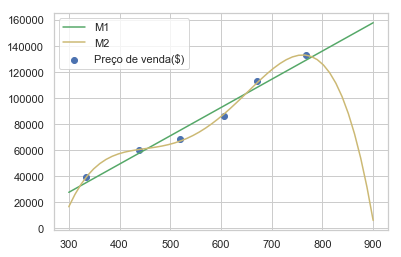

In [24]:
#3.1
def solve_lin_reg(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTy = X.T.dot(y)
    theta = XTX_inv.dot(XTy)
    return theta

x_train = np.array(df_train.iloc[:,0])
phi1 = np.array([np.ones(6), x_train]).T
phi2 = np.array([np.ones(6), x_train, x_train**2, x_train**3, x_train**4]).T
y = np.array(df_train.iloc[:,1])

theta1 = solve_lin_reg(phi1, y)
theta2 = solve_lin_reg(phi2, y)

plot_space = np.linspace(300, 900)
linspace_M1 = np.array([np.ones(50), plot_space]).T
linspace_M2 = np.array([np.ones(50), plot_space, plot_space**2, plot_space**3, plot_space**4]).T
m1_y = linspace_M1.dot(theta1)
m2_y = linspace_M2.dot(theta2)

plt.scatter(df_train.iloc[:,0], df_train.iloc[:,1], c='b')
plt.plot(plot_space, m1_y, c='g', label='M1')
plt.plot(plot_space, m2_y, c='y', label='M2')
plt.legend()
plt.show()

Já podemos notar pelo gráfico que o modelo M2 está com <i>overfit</i>. Isso irá se refletir no erro quadrático médio do conjunto de teste.

In [10]:
#3.2
def mse(y_pred, y_true):
    return np.sum((y_true - y_pred)**2)

y_pred1 = phi1.dot(theta1)
y_pred2 = phi2.dot(theta2)

M1_mse = mse(y_pred1, y)
M2_mse = mse(y_pred2, y)

print("Train MSE for M1: {:.2f}\n"
      "Train MSE for M2: {:.2f}\n"
      "Ratio of MSE M1/M2: {:.5f}"
      .format(M1_mse, M2_mse, M1_mse/M2_mse)
     )

Train MSE for M1: 170317094.86
Train MSE for M2: 5461192.84
Ratio of MSE M1/M2: 31.18679


In [11]:
#3.3
x_test = np.array(df_test.iloc[:,0])
phi1_test = np.array([np.ones(2), x_test]).T
phi2_test = np.array([np.ones(2), x_test, x_test**2, x_test**3, x_test**4]).T
y_test_pred1 = phi1_test.dot(theta1)
y_test_pred2 = phi2_test.dot(theta2)
print("Estimated test y values:\n"
     "M1: {}\n"
     "M2: {}"
     .format(y_test_pred1, y_test_pred2)
     )

Estimated test y values:
M1: [146699.08713826 160594.77746993]
M2: [ 91726.30059071 -22823.65801812]


In [12]:
#3.4
y_test_true = np.array([155900, 156000])
M1_test_mse = mse(y_test_pred1, y_test_true)
M2_test_mse = mse(y_test_pred2, y_test_true)

print("Test MSE for M1: {:.2f}\n"
      "Test MSE for M2: {:.2f}\n"
      "Ratio of MSE M1/M2: {:.5f}"
      .format(M1_test_mse, M2_test_mse, M1_test_mse/M2_test_mse)
     )

Test MSE for M1: 105768777.49
Test MSE for M2: 36096164362.86
Ratio of MSE M1/M2: 0.00293


Para o conjunto de treino, o modelo M2 obteve uma melhor performance, devido ao fato de que a expansão de base utilizada é capaz de capturar mais informações acerca do problema e se adaptar melhor aos dados. No entanto, ao fazer isso, o modelo também corre o risco de fazer <i>overfitting</i>, e não generalizar bem para novos dados. <br>
É exatamente isso que podemos observar ao testar os dois modelos no conjunto de teste. O modelo M1, por ser mais simples, generaliza melhor para novos dados, embora seu erro quadrático no conjunto de treino seja maior.

### Questão 4

##### 4.1)

Como visto no livro do Murphy, a regressão logística corresponde ao seguinte modelo:

$$
\begin{align*}
p(y|w;x) & = Ber(y|sigm(w^Tx)) \\
& = p(y=1|x;w)^{\mathbb{I}_{\{y = 1\}}} . (1-p(y=1|x;w))^{\mathbb{I}_{\{y = 0\}}}
\end{align*}
$$

Onde o parâmetro $p(y=1)$ é dado pela função sigmóide:

$$p(y=1|x;w) = sigm(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$$

Para uma amostra de tamanho N, considerando que as amostras são iid, podemos expressar a função <i>likelihood</i> como:

$$\mathcal{L}(w) = \prod_{i=1}^N p(y=1|x_i;w)^{\mathbb{I}_{\{y_i = 1\}}} . (1-p(y=1|x_i;w))^{\mathbb{I}_{\{y_i = 0\}}}$$

Podemos então tirar o <i>log-likelihood</i>, o que nos dará:

$$
\begin{align}
log \mathcal{L}(w) & = \sum_{i=1}^N y_i log\big( p(y=1|x_i;w)\big) + (1-y_i)log\big( 1-p(y=1|x_i;w) \big) \\
& = \sum_{i=1}^N y_i log\big( p(y=1|x_i;w)\big) + (1-y_i)log\big( 1-p(y=1|x_i;w) \big) \\
& = \sum_{i=1}^N y_i log\big( p(y=1|x_i;w)\big) + log\big( 1-p(y=1|x_i;w) \big) - y_i log\big( 1-p(y=1|x_i;w) \big) \\
& = \sum_{i=1}^N log\big( 1-p(y=1|x_i;w) \big) + y_i log \Big( \frac{ p(y=1|x_i;w)}{1-p(y=1|x_i;w)} \Big) \\
\end{align}
$$

Onde, substituindo a função sigmóide nos lugares correspondentes, obteremos:

$$log \mathcal{L}(w) = \sum_{i=1}^N -log\big( 1+e^{w^Tx_i} \big) + y_i w^Tx_i$$

##### 4.2)

É possível calcular o gradiente $g$ da função de <i>log-likelihood</i>:

$$g(w) = \sum_{i=1}^N (y_i - p(y=1|x_i;w))x_{i}$$

No entanto, não é possível encontrar uma solução de forma fechada para esta equação ao igualá-la a 0. Portanto, a única maneira de encontrar os parâmetros para o problema é utilizando algum método de aproximação (por exemplo, método do gradiente).

In [13]:
#4.3
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient(X, y, w):
    z = np.dot(X, w)
    return np.dot(X.T, sigmoid(z) - y)/y.shape[0]

def loss_logreg(X, y, w):
    sumreg = 0.
    n = len(y)
    for i in range(n):
        zi = np.dot(X[i], w)
        sumreg += y[i] - sigmoid(zi)
    return sumreg/n

def gradient_descent(X, y, w0, n_iter=5, learning_rate=0.01, verbose=0):
    wk = w0.copy()
    if verbose:
        print(loss_logreg(X,y,wk))
    for i in range(n_iter):
        wk -= learning_rate*gradient(X, y, wk)
        if verbose:
            print(loss_logreg(X,y,wk))
    return wk    

def predict_probs(X, w):
    return sigmoid(np.dot(X, w))

def predict(X, w, threshold=0.5):
    return predict_probs(X, w) >= threshold

In [14]:
T = 75000
df_train_log = df_train.copy()
df_train_log['Preço de venda($)'] = (df_train_log['Preço de venda($)'] >= T)*1.
df_train_log

,Área do imóvel(sq ft),Preço de venda($)
0,334,0.0
1,438,0.0
2,520,0.0
3,605,1.0
4,672,1.0
5,767,1.0


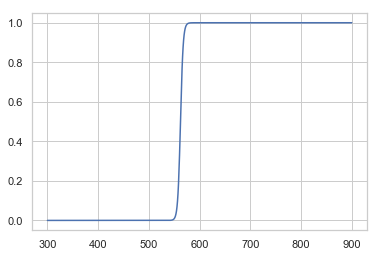

In [15]:
y_train = np.array(df_train_log['Preço de venda($)'])
w0 = np.array([1.0, 2.0])

w = gradient_descent(phi1, y_train, w0, n_iter=1000000, learning_rate=0.01)
plot_space = np.linspace(300, 900, 600)
linspace_M1 = np.array([np.ones(600), plot_space]).T
sigm_logistic = predict_probs(linspace_M1, w)
plt.plot(plot_space, sigm_logistic)
plt.show()

In [16]:
#4.4
A = 560
predict_probs([1, A], w)

0.29450323404029694

Para uma área de 560 sqft, a probabilidade de ela custar mais do que T = 75000 é de aproximadamente $\approx 0.295$.

### Questão 5

##### 5.1)

Para obter $\pi_c$ para cada classe, apenas precisamos dividir o número de documentos de cada classe pelo número total de documentos:

$$\pi_0 = \frac{1072}{2353} \approx 0.46$$
$$\pi_1 = \frac{1281}{2353} \approx 0.54$$

Já para $\theta_{c,j}$, para cada classe, é preciso contar o número de documentos que continham a palavra j, e dividir pelo número total de documentos daquela classe

$$
\begin{align}
&\theta_{0,good} = P(good|C=0) \approx 0.023 && \theta_{1,good} = P(good|C=1) \approx 0.030 \\
&\theta_{0,funny} = P(funny|C=0) \approx 0.026 && \theta_{1,funny} = P(funny|C=1) \approx 0.045 \\
&\theta_{0,love} = P(love|C=0) \approx 0.009 && \theta_{1,love} = P(love|C=1) \approx 0.041 \\
&\theta_{0,bad} = P(bad|C=0) \approx 0.058 && \theta_{1,bad} = P(bad|C=1) \approx 0.002 \\
&\theta_{0,dull} = P(dull|C=0) \approx 0.026 && \theta_{1,dull} = P(dull|C=1) \approx 0.002 \\
&\theta_{0,worst} = P(worst|C=0) \approx 0.022 && \theta_{1,worst} = P(worst|C=1) \approx 0.001 \\
\end{align}
$$

Ou seja, podemos ver que, palavras positivas acontecem mais frequentemente em documentos com análises positivas, enquanto palavras negativas aparecem com maior frequência em documentos com análises negativas.

##### 5.2)

No classificador de Bayes, utilizaremos a fórmula de Bayes para calcular a probabilidade posterior da classe, dado o documento. Ou seja, para a primeira frase da tabela 6, temos:

"This is a very funny, heartwarming film."

Cuja única palavra da lista que está presente é a palavra "funny". Ou seja, para a <i>likelihood</i> desta frase, faremos:

$$
\begin{align}
P(\mathcal{D}|C=1) & = P(funny|C=1).P(\overline{good}|C=1).P(\overline{love}|C=1).P(\overline{bad}|C=1).P(\overline{dull}|C=1).P(\overline{worst}|C=1) \\
& \approx 0.042 
\end{align}
$$

A <i>prior</i> já conhecemos, e é dada por $\pi_1 = 0.54$.

Por último, precisamos calcular $P(D)$, que é facilmente encontrado utilizando a lei da probabilidade total:

$$
\begin{align}
P(D) & = P(D|C=1)P(C=1) + P(D|C=0)P(C=0) \\
& \approx 0.033
\end{align}
$$

Fazendo a conta final, temos:

$$P(C=1|\mathcal{D}) = \frac{P(\mathcal{D}|C=1)P(C=1)}{P(\mathcal{D})} \approx \frac{0.041*0.54}{0.033} \approx 0.68$$

Temos então que, para a primeira frase, a probabilidade de ser uma frase positiva é de ~68%. Fazendo isso para todas as frases, obtemos: <br>

Frase 1: 68% probabilidade de ser positiva <br>
Frase 2: 11% probabilidade de ser positiva<br>
Frase 3: 5% probabilidade de ser positiva<br>

Ou seja, o modelo classificará a primeira frase como sendo positiva, e as outras como sendo negativas.

##### 5.3)

Com os novos dados coletados, os parâmetros $\theta$ não sofrem alterações, já que a proporção de cada palavras para cada classe continua sendo a mesma. No entanto, o <i>prior</i> $\pi$ de cada classe será alterado:

$$\pi_0 = \frac{1072}{129172} \approx 0.01$$
$$\pi_1 = \frac{128100}{129172} \approx 0.99$$

Por conta disso, o modelo terá de ser recalculado, e esperamos ver um peso muito maior sendo dado à classe positiva. O raciocínio será feito para a primeira frase da tabela 6:

O <i>likelihood</i> não sofreu alterações, já que o parâmetro $\theta$ continua igual. Então apenas precisamos recalcular $P(\mathcal{D})$ e levar em consideração o novo <i>prior</i> $\pi$:

$$
\begin{align}
P(D) & = P(D|C=1)P(C=1) + P(D|C=0)P(C=0) \\
& \approx 0.041
\end{align}
$$

Temos assim:

$$P(C=1|\mathcal{D}) = \frac{P(\mathcal{D}|C=1)P(C=1)}{P(\mathcal{D})} \approx \frac{0.041*0.99}{0.041} \approx 0.99$$

Fazendo o mesmo para as outras frases, temos:

Frase 1: 99% probabilidade de ser positiva <br>
Frase 2: 91% probabilidade de ser positiva<br>
Frase 3: 82% probabilidade de ser positiva<br>

Como esperado, a probabilidade de uma frase ser positiva disparou com a coleta dos novos dados. Apesar de palavras negativas estarem mais associados a frases negativas (e o modelo leva isso em consideração, visto a queda de probabilidade entre a frase 1 e as restantes), como o <i>prior</i> não é balanceado entre as classes, ele acaba dominando a classificação dada pelo modelo.

### Questão 6

##### 6.1)

A função pdf de uma única amostra $x$ para uma mistura de $K$ gaussianas é dada por:

$$p(x|\Theta) = \sum_{k=1}^K \alpha_k p(x| \mu_k, \Sigma_k)$$

Onde $\alpha_k$ é a probabilidade da gaussiana $k$ ter gerado a amostra $x$, e $p(x|\mu_k, \Sigma_k)$ é a pdf da gaussiana, dada por:

$$p(x | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}} exp^{-\frac{1}{2}(x - \mu_k)^T\Sigma^{-1}(x-\mu_k)}$$

Onde $x \in \mathcal{R}^d$

Logo, considerando $K = 2$, temos que a pdf para uma mistura de 2 gaussianas é:

$$P(x;\Theta) = \alpha_1 p(x|z_1, \mu_1, \Sigma_1) + \alpha_2 p(x|z_2, \mu_2, \Sigma_2)$$

##### 6.2)

Não é possível obter uma expressão fechada para a MLE dessa mistura, devido a um problema chamado de identifiabilidade. Os parâmetros da primeira distribuição podem ser trocados com o da segunda distribuição, sem, no entanto, alterar os resultados. Em outras palavras, há mais de uma solução para o problema. <br>
Este problema não existia no caso de uma única gaussiana, o que possibilitava encontrar uma forma fechada para a MLE. Mas no caso dos modelos de mistura, esse não é mais o caso.

##### 6.3)

##### Passo E
O passo "E" do algoritmo EM consiste em calcular o peso de cada observação em relação a cada uma das misturas k. Ou seja, para a mistura de 2 gaussianas, temos:

$$w_{i1} = \frac{\alpha_1 p(x_i | z_1, \mu_1, \Sigma_1)}{\alpha_1 p(x_i | z_1, \mu_1, \Sigma_1) + \alpha_2 p(x_i | z_2, \mu_2, \Sigma_2)} $$
$$w_{i2} = \frac{\alpha_2 p(x_i | z_2, \mu_2, \Sigma_2)}{\alpha_1 p(x_i | z_1, \mu_1, \Sigma_1) + \alpha_2 p(x_i | z_2, \mu_2, \Sigma_2)} $$

Que é uma aplicação direta da lei de Bayes. Basicamente, é a probabilidade da gaussiana $k$ ter gerado a observação $x_i$.

##### Passo M
Neste passo, iremos atualizar três parâmetros do problema: $\alpha$, $\mu$ e $\Sigma$, nesta ordem. Primeiramente, para $\alpha$, sabemos que os $w_{ik}$ calculados no passo anterior somam 1 para cada observação, ou seja:

$$\sum_{k=1}^K w_{ik} = 1$$

Se considerarmos então $N_k = \sum_{i=1}^N w_{ik}$ como sendo a soma dos pesos da componente $k$ no conjunto de dados, então a probabilidade da componente $k$ ter gerado uma amostra qualquer $x_i$ é dada por:

$$\alpha_k^{new} = \frac{N_k}{N}$$

Tendo fixado $\alpha_k^{new}$, podemos agora calcular a nova média $\mu_k$ de cada componente. Lembramos que a <i>likelihood</i> do dataset $X$ é dada por: 

$$p(X) = \prod_{n=1}^{N} \sum\limits_{k=1}^{K} \alpha_k p (x_i| \mu_k, \Sigma_k)$$

Tirando o log disso, obtemos:

$$log \: p(X) = log \prod_{n=1}^{N} \sum\limits_{k=1}^{K} \alpha_k p (x_i| \mu_k, \Sigma_k) = \sum\limits_{n=1}^{N} log \sum\limits_{k=1}^{K} \alpha_i p (x_i| \mu_k, \Sigma_k)$$

Derivando $log \: p(X)$ em relação a $\mu_j$, obtemos:

$$\frac{\delta log \: p(X)}{\delta \mu_j} = \sum\limits_{n=1}^{N} \frac{1}{\sum\limits_{k=1}^{K} \alpha_k p (x_i| \mu_k, \Sigma_k)} \alpha_j p (x_i| \mu_j, \Sigma_j) \frac{(\mu_j - x_i)}{\vert \Sigma_j \vert} = \sum\limits_{n=1}^{N} w_{ij} \frac{(\mu_j - x_i)}{\vert \Sigma_j \vert}$$

Igualando $\frac{\delta log \: p(X)}{\delta \mu_j} = 0$, temos finalmente:

$$\sum\limits_{n=1}^{N} w_{ij} \mu_j - \sum\limits_{n=1}^{N} w_{ij} x_i = 0$$

$$\mu_j^{new} = \frac{\sum\limits_{n=1}^{N} w_{ij} x_i}{\sum\limits_{n=1}^{N} w_{ij}} = \frac{1}{N_k} \sum_{i=1}^N w_{ik} x_i$$

Para encontrar o novo valor de $\Sigma_k$, a lógica é a mesma. Obtemos, portanto:

$$\Sigma^{new}_k = \frac{1}{N_k}\sum_{i=1}^N w_{ik} (x_i - \mu_k^{new})(x_i - \mu_k^{new})^T$$

Com os novos parâmetros calculados, substituimos os antigos paramêtros pelos novos, e repetimos o passo E.

/Users/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/lucas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


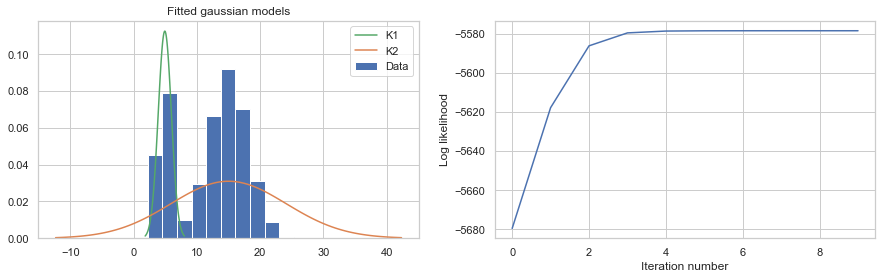

In [8]:
#6.4
def EM(x, mu1, mu2, sigma1, sigma2, alpha1, alpha2, n_iter=5):
    N = len(x)
    wi1 = np.zeros(N)
    wi2 = np.zeros(N)
    log_likelihoods = []
    for n in range(n_iter):
        #Perform E step
        for i in range(N):
            p1 = alpha1*normal_likelihood(x[i], mu1, sigma1)
            p2 = alpha2*normal_likelihood(x[i], mu2, sigma2)
            #print("i,p1,p2,: {},{},{}".format(i, p1,p2))
            wi1[i] = p1/(p1+p2)
            wi2[i] = p2/(p1+p2)
        #Perform M step
        N1, N2 = 0, 0
        for i in range(N):
            N1 += wi1[i]
            N2 += wi2[i]
            
        #Calculate new alphas
        alpha1 = N1/N
        alpha2 = N2/N

        #Calculate new mu
        mu1, mu2 = 0, 0
        for i in range(N):
            mu1 += wi1[i]*x[i]/N1
            mu2 += wi2[i]*x[i]/N2
        
        #Calculate new sigma
        sigma1, sigma2 = 0, 0
        for i in range(N):
            sigma1 += wi1[i]*((x[i] - mu1)**2)/N1
            sigma2 += wi2[i]*((x[i] - mu2)**2)/N2
            
        #Calculate log likelihood for the iteration
        res = 0
        for i in range(N):
            p1 = alpha1*normal_likelihood(x[i], mu1, sigma1)
            p2 = alpha2*normal_likelihood(x[i], mu2, sigma2)
            res += np.log(p1+p2)
        log_likelihoods.append(res)
    return mu1, mu2, sigma1, sigma2, alpha1, alpha2, log_likelihoods


dataEM = open("./data-sets/D2/data-EM.txt", 'r')
data = np.array([float(val[1:-2]) for val in dataEM.readlines()[5:]])
mu1, mu2, sigma1, sigma2, alpha1, alpha2, log_likelihoods = EM(data, 5, 15, 1, 1, 0.5, 0.5, n_iter=10)

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.plot(x1,alpha1*mlab.normpdf(x1, mu1, sigma1), 'C2', label='K1')
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x2,alpha2*mlab.normpdf(x2, mu2, sigma2), 'C1', label='K2')
plt.hist(data, normed=True, color='C0', label='Data')
plt.legend()
plt.title('Fitted gaussian models')

plt.subplot(1,2,2)
plt.plot(log_likelihoods)
plt.xlabel('Iteration number')
plt.ylabel('Log likelihood')
plt.show()